## Les données

Nous utiliserons des données provenant d'un ensemble de données Kaggle :

https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset/data

#### Colonnes Features (caractéristiques)
    
1. age - l'age des patients en années
2. sex - le sexe des patients (1 = homme; 0 = femme)
3. cp - type de douleur thoracique (1 = angine de poitrine typique; 2 = angine de poitrine atypique; 3 = douleur non anginale; 0 = pas de symptome)
4. trtbps - tension artérielle (en mm Hg à l'admission)
5. chol - cholesterol dans le sérum en mg/dl
6. fbs - glycémie à jeun > 120 mg/dl (1 = vrai; 0 = faux)
7. restecg - ECG au repos (1 = normal; 2 = anormalité de l'onde ST-T; 0 = hypertrophie)
8. thalachh - rythme cardiaque maximum
9. exng - angine de poitrine induite par effort (1 = oui; 0 = non)
10. oldpeak - chute de l'onde ST induite par effort
11. slp - la pente du segment ST lors d'un effort (2 = upsloping; 1 = flat; 0 = downsloping)
12. caa - nombre de vaisseaux majeurs (0-3) colorés par fluoroscopie
13. thall - thallium d'effort (2 = normal; 1 = défaut permanant; 3 = défaut réversible)
14. output - the predicted attribute - diagnosis of heart disease

On constate qu'il y a plusieurs données catégorielles qu'il faudra convertir en données numériques.

## Import des bibliothèques et des données

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# lecture à partir de Github pour pouvoir éxécuter le notebook sans se soucier d'importer le fichier csv
url = 'https://raw.githubusercontent.com/CyrilBvt13/Portfolio-MachineLearning/refs/heads/main/HeartAttackAnalysis%26Prediction.csv'
df = pd.read_csv(url)

## Exploration des données

Commençons par l'analyse exploratoire des données (EDA). Visualisons la structure du dataframe chargé.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Nous constatons qu'il n'y a pas de valeurs vides à traiter. Visualisons maintenant les 1ères valeurs de ce dataframe.

In [4]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Comme il s'agit d'un problème de classification, vérifions si le jeu de données est équilibré (colonne output).

<Axes: xlabel='output', ylabel='count'>

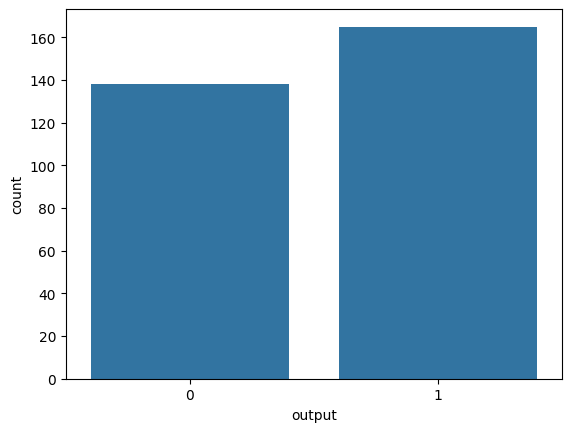

In [ ]:
sns.countplot(x='output', data=df)

Le jeu de données est plutôt équilibré, nous constatons que la répartition entre les prédictions 0 (pas de maladie cardiaque) et 1 (risque de maladie cardiaque) est presque égale.

Observons maintenant la corrélation entre les différentes caractéristiques et la prédiction (output).

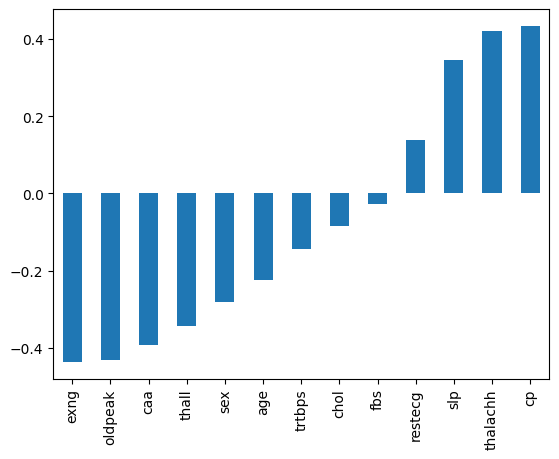

In [ ]:
df.corr()['output'][:-1].sort_values().plot(kind='bar');

On distingue que de nombreuses caractéristiques ont un impact fort sur les prédictions.

On peut notamment citer les caractéristiques :    
- cp (type de douleur thoracique)
- thalachh (rythme cardiaque maximum)
- slp (la pente du segment ST lors d'un effort)
- exng (angine induite par effort)
- oldpeak (chute de l'onde ST induite par effort)
- caa (nombre de vaisseaux majeurs)
- thall (thallium d'effort)

La glycémie à jeun (fbs), le taux de cholesterol (chol), la tension artérielle (trtbps), l'age et le sexe semble quand a elles avoir moins d'impact sur le risque d'attaque cardiaque.

### Visualisation des données

Commençons par explorer le lien entre le type de douleur thoracique (cp) et la prédiction finale (output).

Pour rappel des valeurs possibles de cette caractéristique :
- 1 = angine de poitrine typique
- 2 = angine de poitrine atypique
- 3 = douleur non anginale
- 0 = pas de symptome

<Axes: xlabel='cp', ylabel='count'>

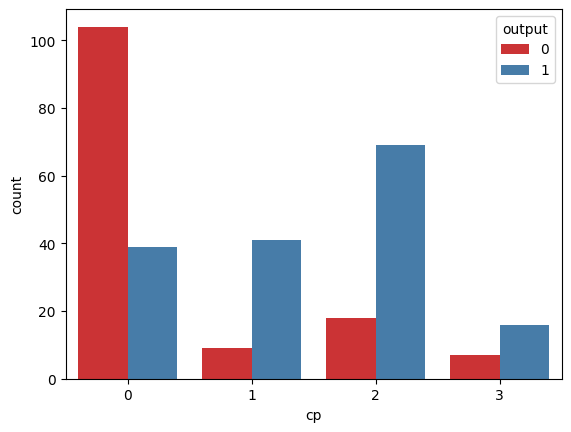

In [11]:
sns.countplot(data=df, x='cp',hue="output",palette='Set1')

On constate que les patients présentant une angine de poitrine (typique ou atypique) ont le plus de chance d'avoir une pathologie cardiaque. Inversement les patients sains ont plus tendance à ne pas présenter de symptome comme on s'y attend.

Explorons maintenant le lien entre le ryhtme cardiaque maximal (thalachh) et le risque de pathologie cardiaque.

<Axes: xlabel='thalachh', ylabel='Density'>

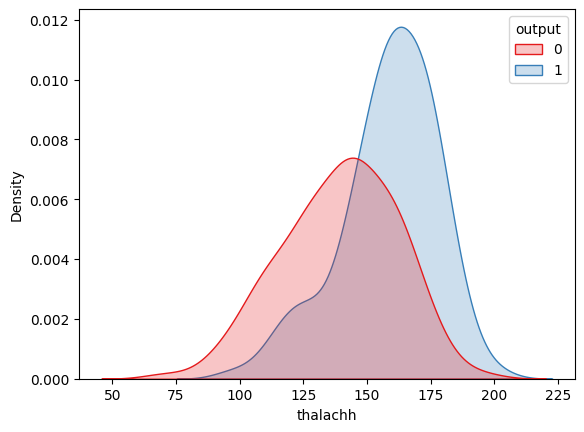

In [6]:
sns.kdeplot(data=df, x='thalachh',hue="output", fill=True ,palette='Set1')

On constate que plus le rythme cardiaque maximal est elevé et plus les patients ont de chance d'avoir une pathologie.

Une des caractéristiques intéressantes à observer est également la pente du segment ST lors d'un effort (slp). Pour rappel il s'agit d'une donnée catégorielle pouvant prendre les valeurs suivantes :    
 - 2 = upsloping
 - 1 = flat
 - 0 = downsloping

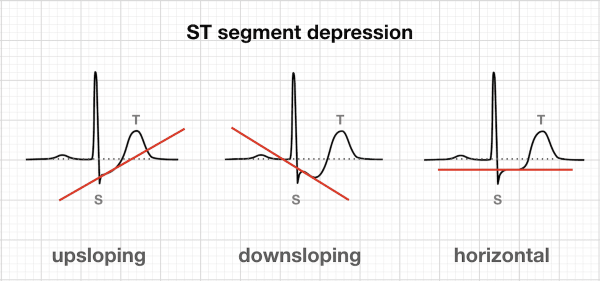

<Axes: xlabel='slp', ylabel='count'>

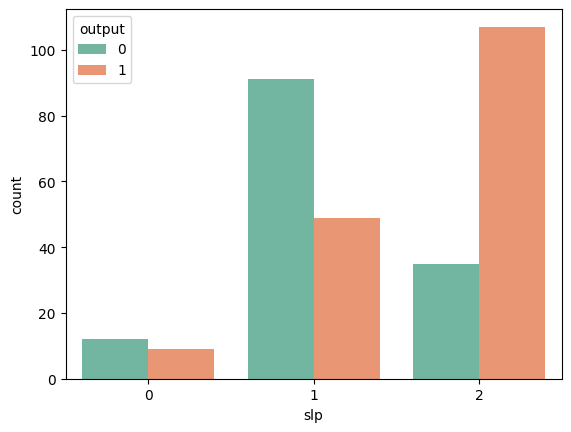

In [10]:
sns.countplot(data=df, x='slp',hue="output",palette='Set2')

On constate que les patients ayant un segment ST montant (upsloping) ont un risque accru de présenter une pathologie cardiaque. Inversement ceux ayant un segment ST plat (flat) présentent moins de risque.

Analysons maintenant les impacts de l'ecg au repos (restecg). Il s'agit la encore d'une caractéristique catégorielle pouvant prendre les valeurs suivantes :     
- 0: normal
- 1: anormalité de l'onde ST-T (T wave inversions and/or ST elevation or depression of > 0.05 mV)
- 2: hypertrophie du ventricule gauche

<Axes: xlabel='restecg', ylabel='count'>

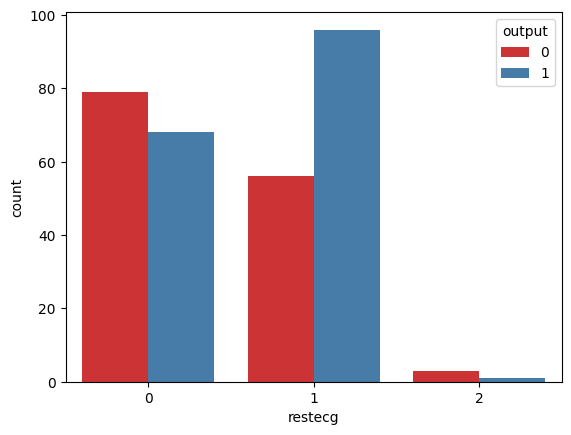

In [9]:
sns.countplot(data=df, x='restecg',hue="output",palette='Set1')

Une anormalité de l'onde ST-T indique un risque élevé de problème cardiaque. L'hypertrophie du ventricule gauche quand à elle ne semble pas avoir d'impact sur ce risque.

Concernant la caractéristique angine de poitrine induite par effort (exgn), nous observons qu'une survenue de cet évenement indique un risque plus faible de problème cardiaque --> INCOHERENT!!

<Axes: xlabel='exng', ylabel='count'>

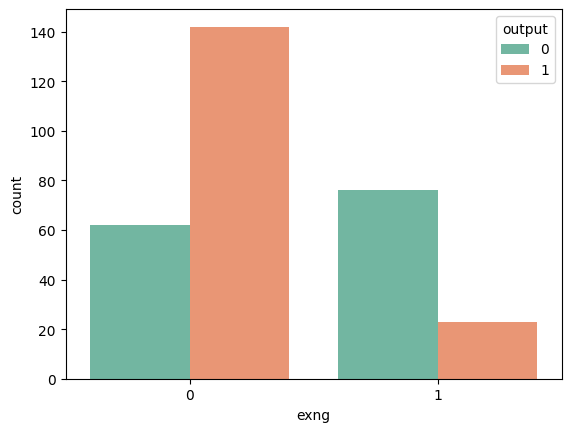

In [4]:
sns.countplot(data=df, x='exng',hue="output",palette='Set2')

Passons à la caractéristique oldpeak décrivant la dépression du segment ST au cours de l'effort par rapport au repos. La dépression ST fait référence à une constatation sur un électrocardiogramme, dans laquelle la trace dans le segment ST est anormalement basse par rapport à la ligne de base.

<Axes: xlabel='oldpeak', ylabel='Density'>

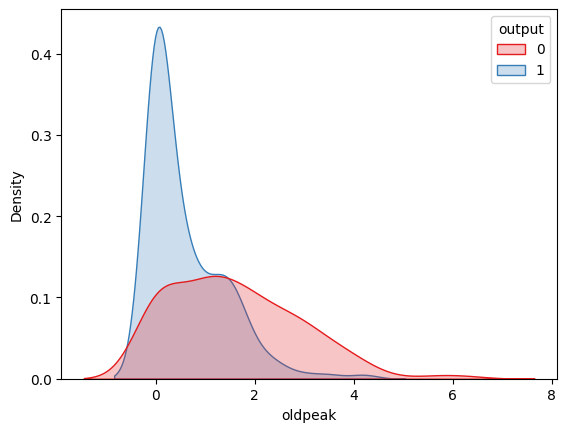

In [3]:
sns.kdeplot(data=df, x='oldpeak',hue="output", fill=True ,palette='Set1')

Pour les patients à risque, on observe que la dépression du segment ST reste faible  --> INCOHERENT!!

Analysons maintenant l'impact du nombre de vaisseaux majeures colorés par fluoroscopie (caa). Les valeurs possibles s'étendent de 0 à 3.

<Axes: xlabel='caa', ylabel='count'>

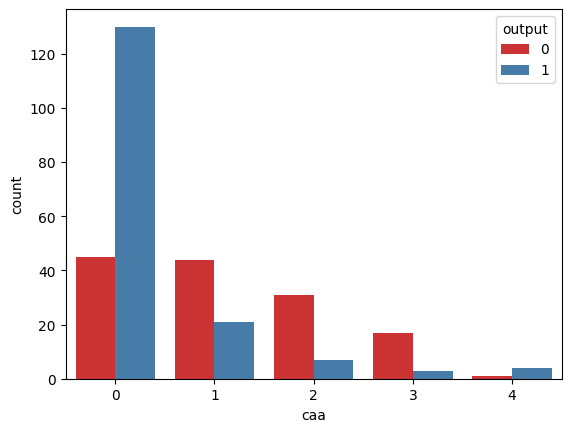

In [7]:
sns.countplot(data=df, x='caa',hue="output",palette='Set1')

Les patients n'ayant pas de vaisseaux colorés par fluoroscipie semblent soumis à un risque acrru de pathologie cardiaque. Ce résultat semble cohérent car il indiquerait une occlusion des vaisseaux.

La caractéristique thallium d'effort devrait également permettre de distinguer les patients à risque. Il s'agit d'un test d'effort avec évaluation de la perfusion myocardique par injection intraveineuse d'une infime quantité de thallium. Les différentes valeurs possibles sont :    
- 1 = défaut permanant
- 2 = normal
- 3 = défaut réversible

<Axes: xlabel='thall', ylabel='count'>

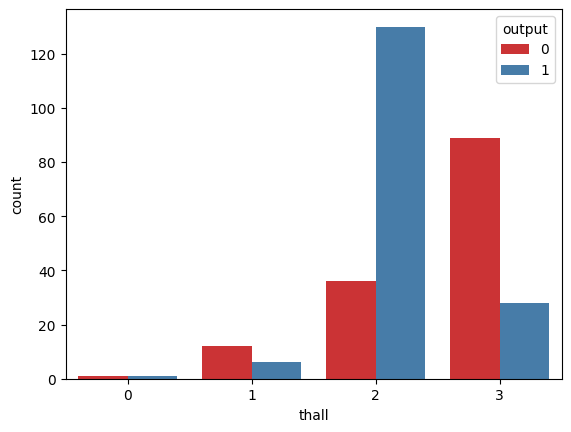

In [4]:
sns.countplot(data=df, x='thall',hue="output",palette='Set1')

*Note : il faudra supprimer les valeurs 0 qui correspondent à des valeurs vides/null*

On constate que la majorité des patients ayant un problème cardiaque ont un thallium d'effort normal --> INCOHERENT!

*Note : on canstate plusieurs incohérences dans les données par rapport aux attentes de la réalité. J'ai créé un topic sur ce dataset Kaggle pour en avoir la confirmation.*

*https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset/discussion/549932*

## Transformation des données, répartition des jeux entrainement/test et mise à l'échelle

### Transformation des données catégorielles en données numériques

In [27]:
# on créée une copie du dataframe df
df1 = df

# on définie les colonnes catégorielles et les colonnes continues
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]

# on encode les colonnes catégorielles grâce à la méthode One-Hot Encoding
df1 = pd.get_dummies(df1, columns = cat_cols, drop_first = True)

#on retire la colonne 'output' de nos caractéristiques car ce sera nos étiquettes à prédire
X = df1.drop(['output'],axis=1)
y = df1[['output']]

# on instancie le scaller
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

# on met à l'échelle les valeurs continues
X[con_cols] = scaler.fit_transform(X[con_cols])

In [9]:
df1.head()

,age,trtbps,chol,thalachh,oldpeak,output,sex_1,exng_1,caa_1,caa_2,...,cp_2,cp_3,fbs_1,restecg_1,restecg_2,slp_1,slp_2,thall_1,thall_2,thall_3
0,63,145,233,150,2.3,1,True,False,False,False,...,False,True,True,False,False,False,False,True,False,False
1,37,130,250,187,3.5,1,True,False,False,False,...,True,False,False,True,False,False,False,False,True,False
2,41,130,204,172,1.4,1,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
3,56,120,236,178,0.8,1,True,False,False,False,...,False,False,False,True,False,False,True,False,True,False
4,57,120,354,163,0.6,1,False,True,False,False,...,False,False,False,True,False,False,True,False,True,False


### Répartition entrainement/test

On sépare les données en 70% jeu d'entrainement et 30% jeu de test.

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=55)

In [29]:
X_train.shape

(212, 22)

In [30]:
X_test.shape

(91, 22)

##Création du modèle

Le modèle sera constitué d'une couche d'entrée de 22 neurones correspondant au nombre de caractéristiques, une couche cachée et une couche de sortie correspondant à la feature "output" à prédire.

S'agissant d'un problème de classification nous utiliserons l'optimizer 'adam' et la fonction de perte 'binary_crossentropy'.

Nous utiliserons également la fonction de 'dropout' pour minimiser le sur-apprentissage sur le jeu d'entrainement.

In [31]:
from tensorflow.keras.layers import Dropout

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Dense(22,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))
# Il s'agit d'un problème de classement avec 2 sorties possibles donc on va utiliser la fonction d'activation sigmoid
model.add(Dense(1,activation='sigmoid'))

# Il s'agit d'un problème de classement donc on va utiliser la fonction de perte binary_crossentropy
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## Entrainement du modèle

In [33]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [34]:
model.fit(x=X_train,
          y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=32,
          epochs=100,
          callbacks=[early_stop])

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.5281 - loss: 0.7024 - val_accuracy: 0.5275 - val_loss: 0.6835
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4819 - loss: 0.7695 - val_accuracy: 0.5495 - val_loss: 0.6713
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5845 - loss: 0.6615 - val_accuracy: 0.5714 - val_loss: 0.6620
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5728 - loss: 0.6757 - val_accuracy: 0.5934 - val_loss: 0.6543
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5314 - loss: 0.7217 - val_accuracy: 0.6044 - val_loss: 0.6475
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5840 - loss: 0.6590 - val_accuracy: 0.6264 - val_loss: 0.6417
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5605 - loss: 0.6812 - val_accuracy: 0.6374 - val_loss: 0.6356
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4986 - loss: 0.7352 - val_accuracy: 0.6374 - val_loss: 

In [35]:
losses = pd.DataFrame(model.history.history)

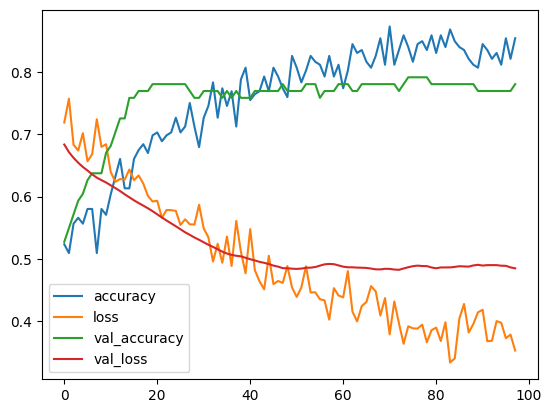

In [40]:
losses.plot();

## Evaluation du modèle

In [41]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = (model.predict(X_test) > 0.5).astype("int32")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [42]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.71      0.74        41
           1       0.78      0.84      0.81        50

    accuracy                           0.78        91
   macro avg       0.78      0.77      0.78        91
weighted avg       0.78      0.78      0.78        91



La précision du modèle est assez faible (78%). Voyons si nous pouvons l'améliorer en automatisant la recherche d'hyperparamètres.

##Automatisation de la recherche d'hyperparamètres

On va utiliser la librairie kera-tuner pour explorer plusieurs hypérparamètres et trouver un meilleur modèle.

In [43]:
pip install -q -U keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.5 MB/s eta 0:00:00


In [44]:
import keras_tuner as kt

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

def build_model(hp):

    model = Sequential()

    model.add(Dense(22,activation='relu')) #13 neurones d'entrée correspondant au nombre de features
    model.add(Dense(hp.Int('units_1', min_value=5, max_value=15, step=2), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(hp.Int('units_2', min_value=5, max_value=15, step=2), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1,activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam')

    return model

newTuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=2,
)
#directory='my_dir',
#project_name='regression_tuning'

newTuner.search(X_train,
                y_train,
                epochs=600,
                validation_data=(X_test, y_test),
                callbacks=[early_stop]
                )


Trial 4 Complete [00h 00m 26s]
val_loss: 0.5045225322246552

Best val_loss So Far: 0.49107636511325836
Total elapsed time: 00h 01m 44s

Search: Running Trial #5

Value             |Best Value So Far |Hyperparameter
5                 |13                |units_1
11                |15                |units_2

Epoch 1/600
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 0.6477 - val_loss: 0.6158
Epoch 2/600
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.6417 - val_loss: 0.6070
Epoch 3/600
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6029 - val_loss: 0.5972
Epoch 4/600
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6292 - val_loss: 0.5879
Epoch 5/600
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6504 - val_loss: 0.5792
Epoch 6/600
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6061 - val_loss: 0.5695
Epoch 7/600
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6091 - val_loss: 0.5621
Epoch 8/600
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6304 - val_loss: 0.5551
Epoch 9/600
7/7 ━━━━

KeyboardInterrupt: 

In [ ]:
#On récupère le meilleur modèle
models = newTuner.get_best_models(num_models=1)
best_model = models[0]
best_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 13)                  │             182 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 36)                  │             504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 36)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 20)                  │             740 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,447 (5.65 KB)

 Trainable params: 1,447 (5.65 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
best_hps = newTuner.get_best_hyperparameters(5)
# Build the model with the best hp.
model = build_model(best_hps[0])
model.fit(x=X_train,
          y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=32,
          epochs=600,
          callbacks=[early_stop])

Epoch 1/600
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 338ms/step - loss: 0.6926 - val_loss: 0.6862
Epoch 2/600
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.6872 - val_loss: 0.6808
Epoch 3/600
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6724 - val_loss: 0.6754
Epoch 4/600
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6773 - val_loss: 0.6688
Epoch 5/600
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6712 - val_loss: 0.6604
Epoch 6/600
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6668 - val_loss: 0.6525
Epoch 7/600
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6588 - val_loss: 0.6433
Epoch 8/600
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6355 - val_loss: 0.6320
Epoch 9/600
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6272 - val_loss: 0.6205
Epoch 10/600
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6228 - val_loss: 0.6084
Epoch 11/600
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6111 - val_loss: 0.5936
Epoch 12/600
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5860 - val_loss: 0.575

In [ ]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.73      0.78        41
           1       0.80      0.88      0.84        50

    accuracy                           0.81        91
   macro avg       0.82      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91



Nous avons obtenus un précision légèrement suppérieur (81%) mais qui reste encore faible pour pouvoir prédire correctement le risque d'AVC.